<a href="https://colab.research.google.com/github/DanielGreiner/Masterarbeit/blob/main/Isothermal_steady_state_1D_PFR_trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text

# Introcode



# Load libraries

In [47]:
# @title import libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import torch as to
from scipy.integrate import odeint

In [48]:
# @title check library versions
print("tensorflow:" + str(tf.__version__))
print("numpy:" + str(np.__version__))
print("pandas:" + str(pd.__version__))
#print("torch:" + str(to.__version__))

tensorflow:2.13.0
numpy:1.23.5
pandas:1.5.3


# Code Setup

In [49]:
# @title Konstanten laden
k = 1
u = 1.500
A = 3*10**-3
v = u*A
Vges = 0.015
steps = 1000
dV = Vges/steps
z = Vges/A
r = np.sqrt(A/3.14)
# print (steps)
# print (dV)
print (v)
print (z)
print (r)

0.0045000000000000005
5.0
0.030909772123696635


In [50]:
# @title Startwerte
t0 = 0
z0 = 0
V0 = 0
T0 = 298
cA0 = 2

# PFTR Isotherm Stationär

ODE: $\frac{dc_A}{dz}$=-$\frac{1}{u_0}$⋅k⋅$c_A$

$\frac{dc_A}{dV}$=-$\frac{1}{V.}$⋅k⋅$c_A$

In [69]:
# @title Euler Verfahren manuell
V = V0
cA = cA0
cAtemp = cA0
res = np.zeros((steps+1, 2))
res[0,0] = V0
res[0,1] = cA0

for i in range(steps):
  cA = cAtemp - (1/v)*k*cAtemp*dV
  cAtemp = cA
  V = V + dV
  res[i+1,0] = V*1000
  res[i+1,1] = cA

#print("cA = "+ str(cA))
#print("V = "+ str(V))
#print(res)

In [67]:
# @title Berechnung mittels ODE-Solver

Vsp = np.arange(0, Vges, dV)

def dcdV(C, V):
  cA = C
  dCdV = -(1/v)*k*C
  return dCdV

sol = odeint(dcdV, cA0, Vsp)
#print(sol[:,0])
#print(Vsp)

# Vergleich Euler und Solver

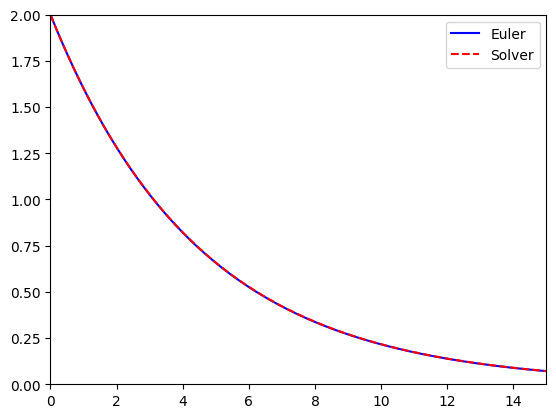

In [71]:
# @title Plots

plt.plot(res[:,0],res[:,1], 'b', label='Euler')
plt.plot(Vsp*1000, sol[:,0], 'r', label='Solver', linestyle='dashed')
plt.axis((0, 15, 0, 2))
plt.legend(loc='best')
